In [169]:
from os import listdir
from os.path import isfile, join
import random
from PIL import Image
import math
import numpy as np

import cv2
from matplotlib import pyplot as plt

import numpy as np
import torchvision.models.segmentation
import torch
import torchvision.transforms as tf


width = height = 140

In [170]:
def LoadImg(name):
    path = 'GeneratedImages/' + name
    image = Image.open(path)
    angle = path.split('_')[1]

    transformImg=tf.Compose([tf.ToPILImage(),tf.Resize((height,width)),tf.ToTensor(),tf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) 
    image=transformImg(np.array(image))
    return image, float(angle), path

In [171]:
path = 'GeneratedImages'
files = [f for f in listdir(path) if isfile(join(path, f))]

#randomise the order of the files list
random.shuffle(files)

def LoadRandomImg():
    path = 'GeneratedImages/' + files[random.randrange(0,len(files))]
    image = Image.open(path)
    angle = path.split('_')[1]

    transformImg=tf.Compose([tf.ToPILImage(),tf.Resize((height,width)),tf.ToTensor(),tf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) 
    image=transformImg(np.array(image))
    return image, float(angle), path

GeneratedImages/day1_0.87_degrees_x2y2_crop.jpg


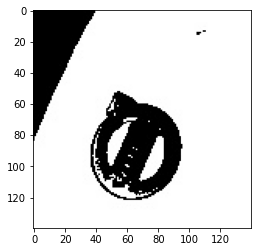

FileNotFoundError: [Errno 2] No such file or directory: '14.torch'

In [184]:
image, angle, path = LoadRandomImg()

print(path)
#Import image
cv2img = cv2.imread(path)

#Show the image with matplotlib
plt.imshow(cv2img)
plt.show()

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
Net = torchvision.models.resnet18() # Load net
Net.fc = torch.nn.Linear(in_features=512, out_features=1, bias=True) # Set final layer to predict one value
Net = Net.to(device) # Assign net to gpu or cpu

modelPath = '14.torch'
Net.load_state_dict(torch.load(modelPath))

#Net.eval() # Set net to evaluation mode, usually usefull in this case its fail


Img = torch.autograd.Variable(image, requires_grad=False).to(device).unsqueeze(0) # Convert to pytorch

with torch.no_grad():
    Prd = Net(Img)  # Run net

print("Predicted Steering Angle: ", Prd.data.cpu().numpy()[0][0])
print("Real Steering Angle: ", angle)